# <center><font style="color:rgb(100,109,254)"> Finding Dominant Color in Image</font><center>

Finding dominant color is pretty simple when you know how to get histograms of image, one other thing to do is while finding the dominant color of any image you should convert it into a color Model in which colors are clearly defined e.g. HSV Color Model. In which the the distribution of hue values (histogram) can tell us which color is more prominent in the image.

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Lets Convert the image to HSV, split the Channels

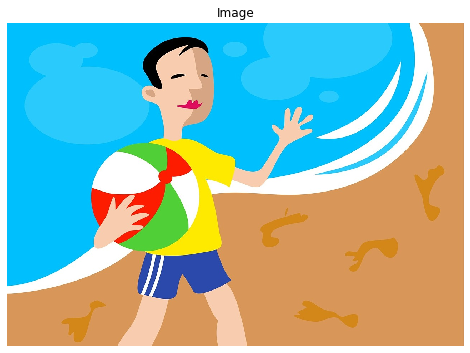

In [28]:
img = cv2.imread('media/M4/beach.jpg')
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsvImage)

plt.figure(figsize=[18,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off');

**Before we pass in the Hue to the histogram we need to flatten it.**

In [29]:
print('Shape before Flattening {}'.format(H.shape))

H_array = H.flatten()

print('Shape After Flattening {}'.format(H_array.shape))

Shape before Flattening (906, 1280)
Shape After Flattening (1159680,)


**Now lets see the Dominant Color**

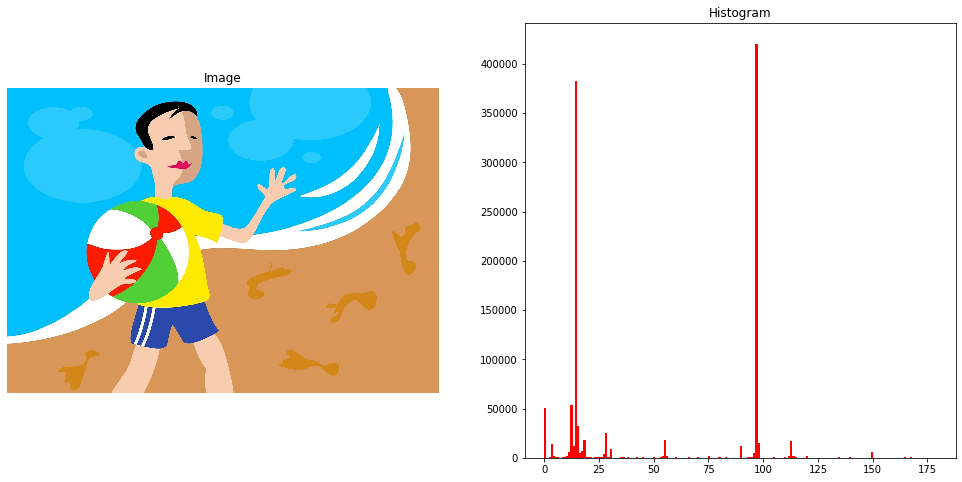

In [30]:
plt.figure(figsize=[17,8])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off');
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram");

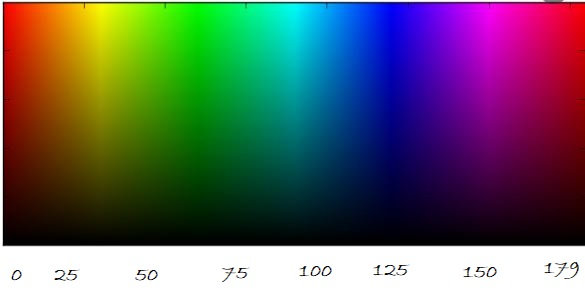

Now lets do this with another Image

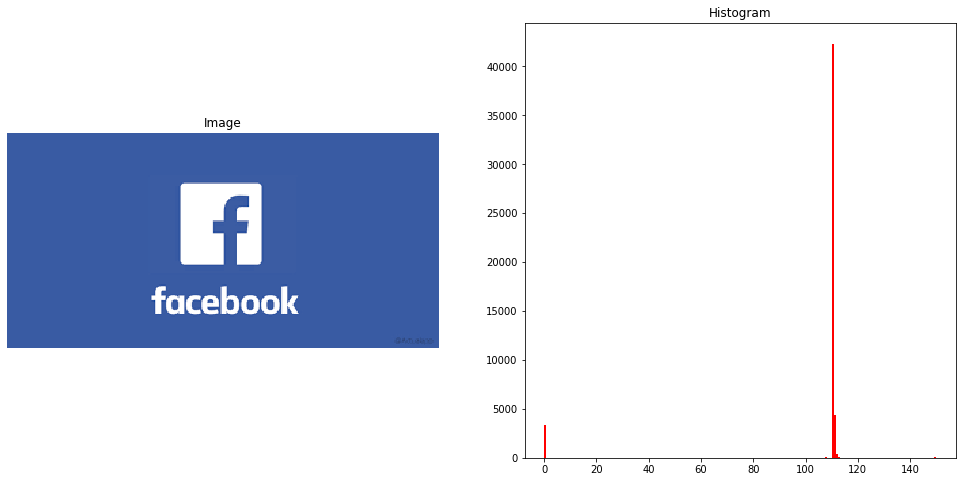

In [31]:
img = cv2.imread('media/M4/facebook.png')
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsvImage)
H_array = H.flatten()

plt.figure(figsize=[17,8])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off');
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram");

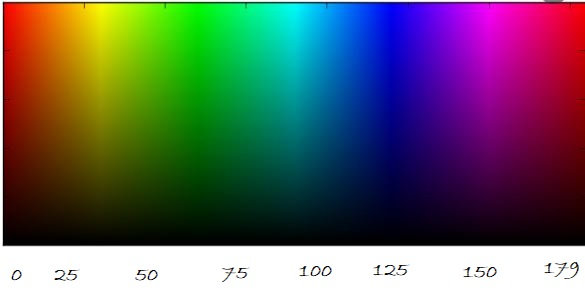

**Now there is a problem with the above histogram, as you can see there is no red color present in the image but still its showing some red in the histogram, so the problem here is that the white part of FB possibly contains red hue values and the reason you're not seeing red is because the saturation for that part is almost 0, which is why you're seeing white.**

So Its always a good practice to filter out values with lower saturation values before plotting the histogram, we will do that now.

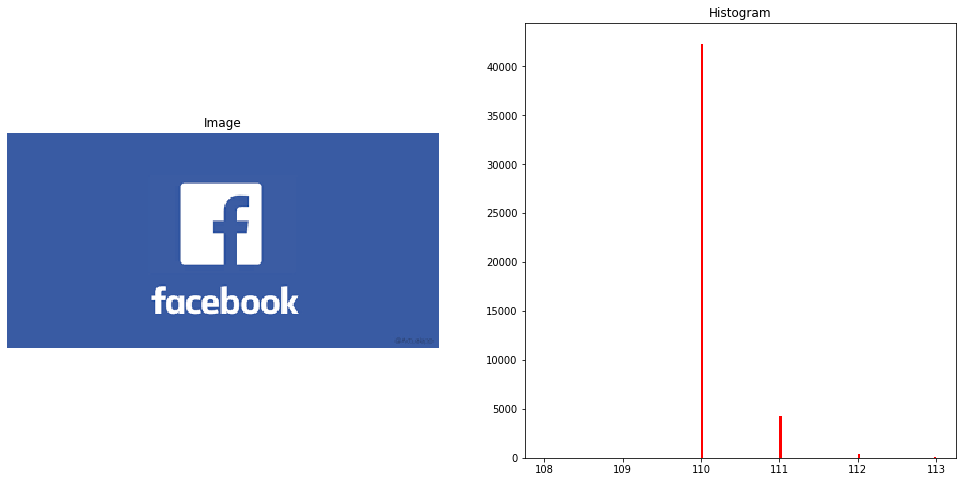

In [32]:
img = cv2.imread('media/M4/facebook.png')
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsvImage)
H_array = H[S > 15].flatten()

plt.figure(figsize=[17,8])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Image");plt.axis('off');
plt.subplot(122);plt.hist(H_array, bins=180, color='r');plt.title("Histogram");

See no red values now

**Most Occuring Value of Hue:**

In [33]:
import statistics as st
st.mode(H_array)

110